# First we will import all the libraries and do some descriptive statistics with the models


In [1]:
#Import libraries 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [2]:
#Install the data set

# 1.-Install the ucimlrepo package
!pip3 install -U ucimlrepo 



In [3]:

#Install the data set
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [4]:
# Saving the data as df1 

df1 = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.original
df1.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#Name of the columns
df1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
#data preview
df1.shape

(2111, 17)

In [7]:
#data preview 2
df1.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#data preview 3
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
# Display of the numeric columns
display(df1.describe(include='number'))


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
#Answers in the data set
for col in df1.select_dtypes(include=['object','category','bool']).columns:
    print(f"\n*** Column: {col} ***")
    print(df1[col].value_counts())  # Changed df to df1 to be consistent
    print("")




*** Column: Gender ***
Gender
Male      1068
Female    1043
Name: count, dtype: int64


*** Column: family_history_with_overweight ***
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


*** Column: FAVC ***
FAVC
yes    1866
no      245
Name: count, dtype: int64


*** Column: CAEC ***
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


*** Column: SMOKE ***
SMOKE
no     2067
yes      44
Name: count, dtype: int64


*** Column: SCC ***
SCC
no     2015
yes      96
Name: count, dtype: int64


*** Column: CALC ***
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


*** Column: MTRANS ***
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


*** Column: NObeyesdad ***
NObeyesdad
Obesity_Type_I         351
Obesity_Type_I

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


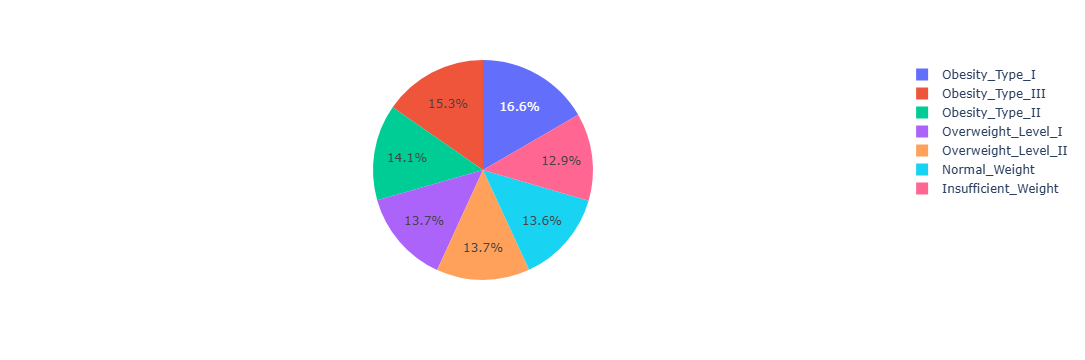

In [11]:
# Percentage of responses given NOeyesdad
print(df1['NObeyesdad'].value_counts(normalize=True))

# Create a dataframe with the count of each category in NObeyesdad
category_counts = df1['NObeyesdad'].value_counts().reset_index()
# Rename columns 
category_counts.columns = ['Category', 'count']  

# Pie chart with the correct dataframe
px.pie(category_counts, values='count', names='Category')



In [12]:
# Group by the obesities
df1.groupby('NObeyesdad').agg('count')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
NObeyesdad,,,,,,,,,,,,,,,,
Insufficient_Weight,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
Normal_Weight,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
Obesity_Type_I,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351
Obesity_Type_II,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
Obesity_Type_III,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
Overweight_Level_I,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290
Overweight_Level_II,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290


In [13]:
#Some descriptive statistics
df1.groupby('NObeyesdad')[['Age', 'Weight', 'Height', 'FAF', 'TUE']].agg(['mean', 'std', 'min', 'max'])


Age                            Weight             \
                          mean       std   min   max        mean        std   
NObeyesdad                                                                    
Insufficient_Weight  19.783237  2.669511  16.0  39.0   49.906330   6.010708   
Normal_Weight        21.738676  5.096756  14.0  61.0   62.155052   9.296031   
Obesity_Type_I       25.884941  7.755700  15.0  52.0   92.870198  11.485987   
Obesity_Type_II      28.233785  4.868199  20.0  41.0  115.305311   8.024320   
Obesity_Type_III     23.495554  2.764324  18.0  26.0  120.941114  15.532225   
Overweight_Level_I   23.417674  6.125076  16.0  55.0   74.266828   8.470944   
Overweight_Level_II  26.996981  8.061061  17.0  56.0   82.085271   8.450932   

                                     Height                             FAF  \
                       min    max      mean       std   min   max      mean   
NObeyesdad                                                                    
Insufficient_Weight   39.0   65.0  1.691117  0.099687  1.52  1.90  1.250131   
Normal_Weight         42.3   87.0  1.676585  0.094526  1.50  1.93  1.247387   
Obesity_Type_I        75.0  125.0  1.693804  0.098414  1.50  1.98  0.986748   
Obesity_Type_II       93.0  130.0  1.771795  0.072723  1.60  1.92  0.971857   
Obesity_Type_III     102.0  173.0  1.687559  0.065263  1.56  1.87  0.664817   
Overweight_Level_I    53.0   91.0  1.687836  0.095999  1.45  1.90  1.056796   
Overweight_Level_II   60.0  102.0  1.703748  0.089441  1.48  1.93  0.958072   

                                              TUE                      
                          std  min  max      mean       std  min  max  
NObeyesdad                                                             
Insufficient_Weight  0.856625  0.0  3.0  0.839459  0.643231  0.0  2.0  
Normal_Weight        1.016362  0.0  3.0  0.675958  0.686697  0.0  2.0  
Obesity_Type_I       0.894675  0.0  3.0  0.676743  0.687897  0.0  2.0  
Obesity_Type_II      0.581238  0.0  2.0  0.515186  0.563862  0.0  2.0  
Obesity_Type_III     0.732864  0.0  2.0  0.604623  0.281852  0.0  1.0  
Overweight_Level_I   0.851600  0.0  3.0  0.612992  0.677714  0.0  2.0  
Overweight_Level_II  0.824744  0.0  3.0  0.697275  0.588436  0.0  2.0

# Part 2 Preparation for the regression analysis
 For this analysis we are going to only count Obesity and do no distiction in between them.
 
 Our predicted (Dependent) variable is going to be called 'Obese_binary'

In [107]:
#Create the binary variable, for clarity in the study 

df1['Obese_binary'] = df1['NObeyesdad'].apply(
    lambda x: 1 if x in [
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ] else 0
)


In [108]:
# Displaying the df1
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obese_binary
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


In [109]:
#Distribution 
df1['Obese_binary'].value_counts()

Obese_binary
0    1139
1     972
Name: count, dtype: int64

In [110]:
# Clean column names: remove tabs, spaces, line breaks for good analysis
df1.columns = df1.columns.str.replace(r'\s+', '', regex=True)
df1.columns = df1.columns.str.strip()
df1.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Obese_binary'],
      dtype='object')

In [111]:
#Get the X and Y for the logistic regression
y = df1['Obese_binary']
X = df1.drop(['Obese_binary', 'NObeyesdad'], axis=1)

X.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [112]:
# Identify categorical and numeric features 
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Numeric:", numeric_features.tolist())
print("Categorical:", categorical_features.tolist())


Numeric: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [113]:
import numpy as np

# Clean strings, lowercase, remove spaces
X[categorical_features] = X[categorical_features].astype(str).apply(
    lambda col: col.str.strip().str.lower()
)


In [114]:
#Train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


In [117]:
log_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [118]:
#Get the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       228
           1       0.99      0.99      0.99       195

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

[[226   2]
 [  2 193]]


C:\Users\anton\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning:

Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros



The model is unrealistic, has a 99% accuaracy

In [119]:

feature_names = log_model.named_steps['preprocess'].get_feature_names_out()
feature_names[:20]


array(['num__Age', 'num__Height', 'num__Weight', 'num__FCVC', 'num__NCP',
       'num__CH2O', 'num__FAF', 'num__TUE', 'cat__Gender_male',
       'cat__family_history_with_overweight_yes', 'cat__FAVC_yes',
       'cat__CAEC_frequently', 'cat__CAEC_no', 'cat__CAEC_sometimes',
       'cat__SMOKE_yes', 'cat__SCC_yes', 'cat__CALC_no',
       'cat__CALC_sometimes', 'cat__MTRANS_bike', 'cat__MTRANS_motorbike'],
      dtype=object)

In [120]:
# This gives us the top 20 highest indicators for overweight 
# Keep in mind that all variables were included so multicollinearity is high 

import numpy as np

coeffs = log_model.named_steps['model'].coef_[0]

odds_ratios = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs,
    'Odds_Ratio': np.exp(coeffs)
}).sort_values('Odds_Ratio', ascending=False)

odds_ratios.head(20)


,Feature,Coefficient,Odds_Ratio
2,num__Weight,9.650931,15536.249457
10,cat__FAVC_yes,1.381510,3.980907
14,cat__SMOKE_yes,0.659389,1.933611
19,cat__MTRANS_motorbike,0.580501,1.786934
13,cat__CAEC_sometimes,0.524977,1.690419
9,cat__family_history_with_overweight_yes,0.374804,1.454707
6,num__FAF,0.153525,1.165937
5,num__CH2O,0.122278,1.130068
20,cat__MTRANS_public_transportation,0.037256,1.037959
18,cat__MTRANS_bike,-0.001482,0.998519


In [121]:
corr_matrix = df1.select_dtypes(include=["number"]).corr()


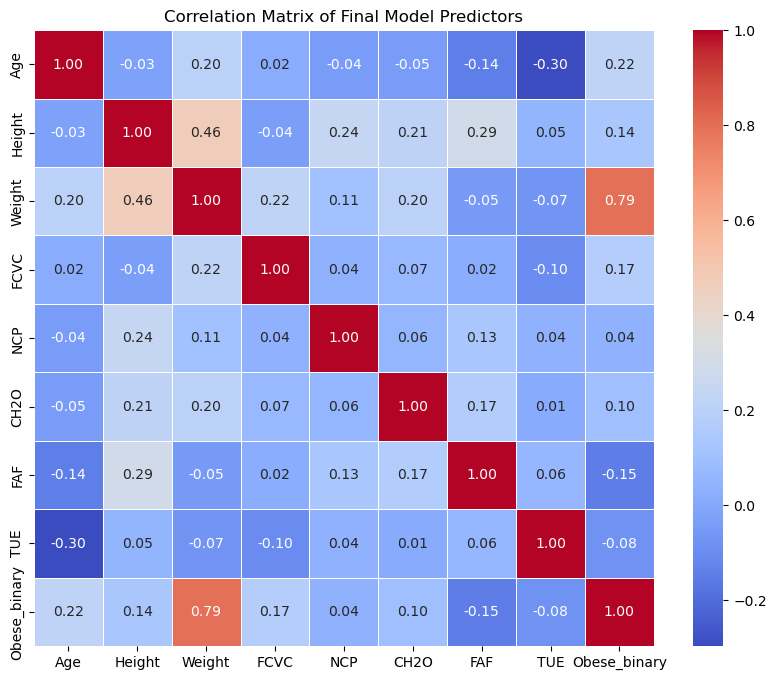

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Final Model Predictors")
plt.show()


# The model came out with high correlation, so we can say its multicollinearity is going to be high
# In order to construct a more realistic model we need to stay with variables that we can controll.


In [123]:
#New model more realistic
keep_vars = [
    'Age',
    'FCVC',
    'CH2O',
    'FAF',
    'TUE',
    'FAVC',
    'family_history_with_overweight'
]

X_small = df1[keep_vars]
y = df1['Obese_binary']

In [124]:
from sklearn.preprocessing import OneHotEncoder

cat_vars = ['FAVC', 'family_history_with_overweight']
num_vars = ['Age', 'FCVC', 'CH2O', 'FAF', 'TUE']

# One-hot encode
encoder = OneHotEncoder(drop='first')
X_cat = pd.DataFrame(
    encoder.fit_transform(X_small[cat_vars]).toarray(),
    columns=encoder.get_feature_names_out(cat_vars)
)

# Numeric variables
X_num = X_small[num_vars].reset_index(drop=True)

# Combine
X_new = pd.concat([X_num, X_cat], axis=1)

# Add intercept
import statsmodels.api as sm
X_new = sm.add_constant(X_new)


In [125]:
logit_model = sm.Logit(y, X_new)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.511931
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Obese_binary   No. Observations:                 2111
Model:                          Logit   Df Residuals:                     2103
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.2581
Time:                        16:28:17   Log-Likelihood:                -1080.7
converged:                       True   LL-Null:                       -1456.6
Covariance Type:            nonrobust   LLR p-value:                4.492e-158
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -8.9683      0.606    

In [126]:
y_prob = result.predict(X_new)
y_pred = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


Confusion Matrix:
[[753 386]
 [169 803]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1139
           1       0.68      0.83      0.74       972

    accuracy                           0.74      2111
   macro avg       0.75      0.74      0.74      2111
weighted avg       0.75      0.74      0.74      2111



In [127]:
 # Checking VIF
X_vif = X_new.drop(columns=['const'])


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop the intercept for VIF calculation
X_vif = X_new.drop(columns=['const'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

vif_data


,Feature,VIF
0,Age,12.736060
1,FCVC,14.532429
2,CH2O,10.874534
3,FAF,2.483511
4,TUE,2.187722
5,FAVC_yes,8.256531
6,family_history_with_overweight_yes,6.175599


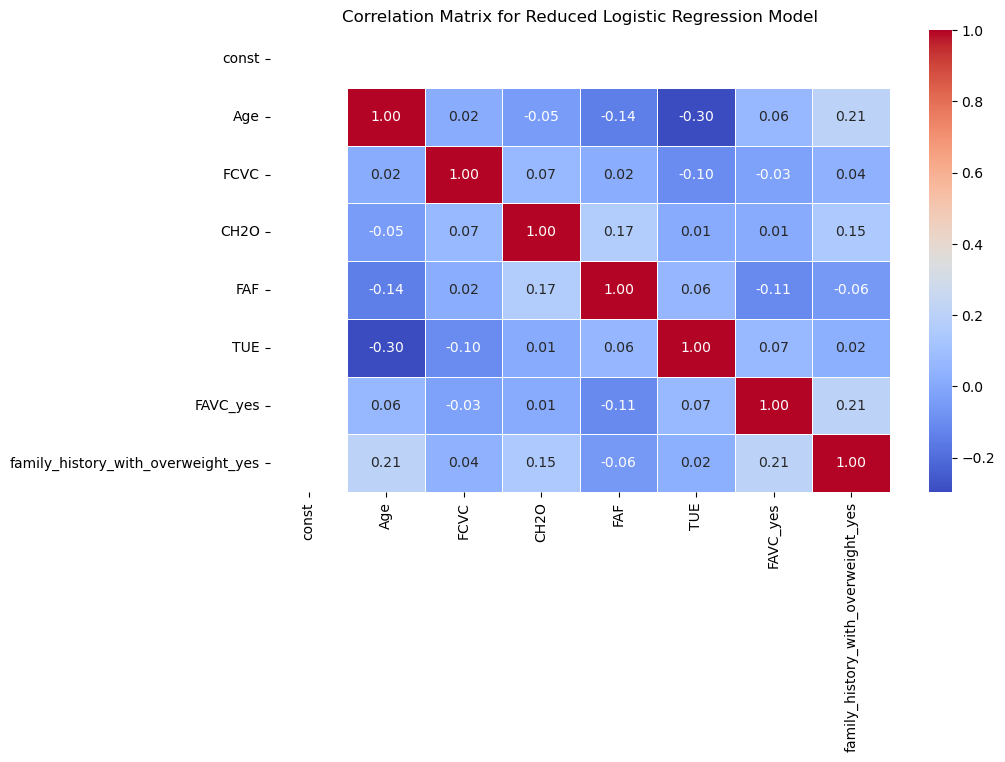

In [129]:
# Correlation Matrix for the Second (Reduced) Model
corr_reduced = X_new.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_reduced,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix for Reduced Logistic Regression Model")
plt.show()
